<a href="https://colab.research.google.com/github/YashM246/Comparison-of-ID3-and-Naive-Bayes/blob/main/DWM_Project_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import pickle


# Importing Dataset


In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

# Data Exploration

<Figure size 432x288 with 0 Axes>

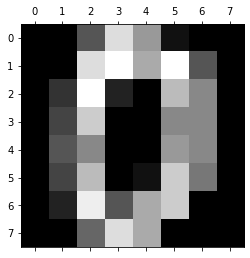

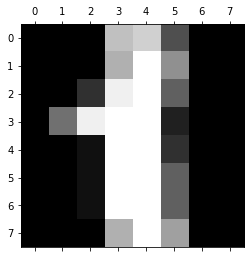

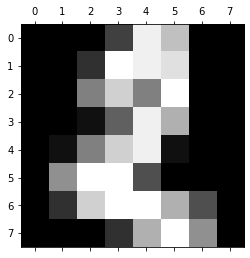

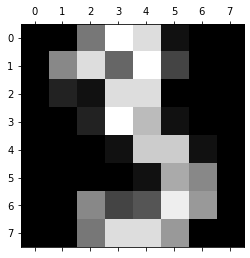

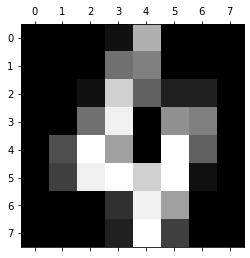

In [3]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i]) 

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# Data Preprocessing

In [7]:
scaler = StandardScaler()

In [8]:
x = df
y = digits.target

In [9]:
x_scaled = scaler.fit_transform(x)

# Principle Component Analysis

In [10]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
# Retains 95% of useful features and creates new dimensions

x_pca = pca.fit_transform(x_scaled)

In [11]:
x_scaled.shape

(1797, 64)

In [12]:
x_pca.shape

(1797, 40)

# Splitting Dataset into Training Set and Testing Set

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=42, test_size=0.2)

In [14]:
len(x_train)

1437

In [15]:
len(x_test)

360

# Decision Tree Algorithm

In [16]:
DT = tree.DecisionTreeClassifier()

In [17]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred_dt = DT.predict(x_test)

In [19]:
DT.score(x_test, y_test)

0.8305555555555556

In [20]:
r2_score(y_test, y_pred_dt)
# R-squared (R2) is a statistical measure that represents the proportion of the 
# variance for a dependent variable that's explained by an independent variable or variables

0.6537047340404809

# Naive Bayes Algorithm

In [21]:
GB = GaussianNB()

In [22]:
GB.fit(x_train, y_train)

GaussianNB()

In [23]:
y_pred_nb = GB.predict(x_test)

In [24]:
GB.score(x_test, y_test)

0.8916666666666667

In [25]:
r2_score(y_test, y_pred_nb)

0.7403684506513264

# Confusion Matrix Comparison

Text(0.5, 1.0, 'Naive Bayes Algorithm')

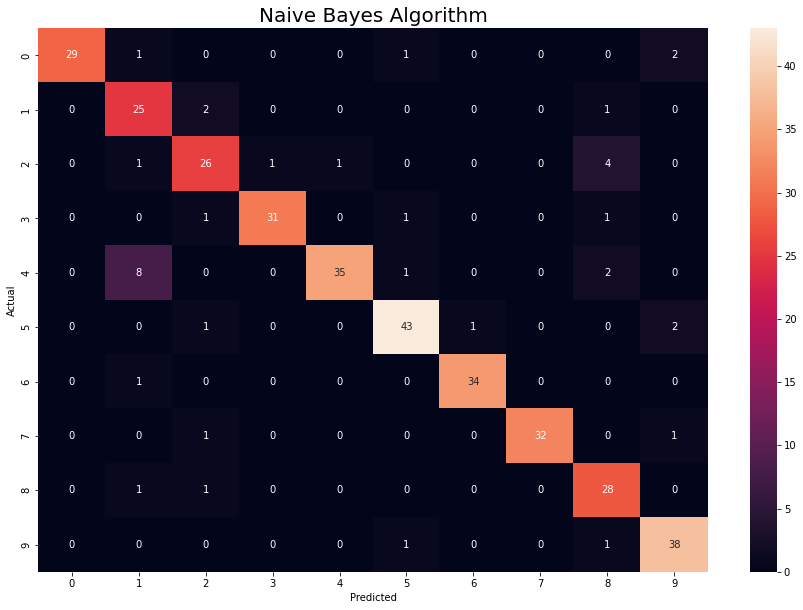

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Naive Bayes Algorithm", fontsize="20")

Text(0.5, 1.0, 'ID3 Algorithm')

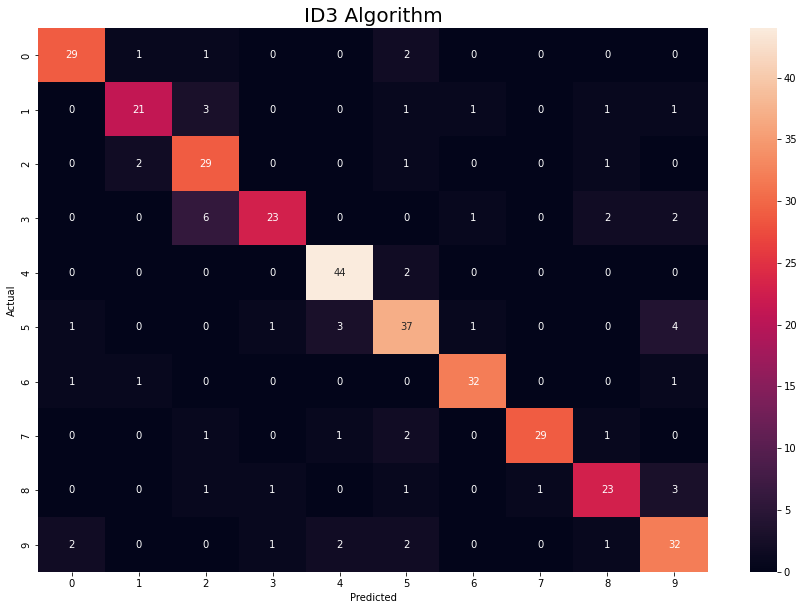

In [27]:
cm2 = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(15,10))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("ID3 Algorithm", fontsize="20")

# Pipelining

In [30]:
pipeGB = Pipeline([('scaler', StandardScaler()), ('pca',PCA(0.95)) , ('GB', GaussianNB())])
pipeDT = Pipeline([('scaler', StandardScaler()), ('pca',PCA(0.95)) ,  ('DT', tree.DecisionTreeClassifier())])

# Exporting Models using pickle

In [31]:
pickle_out = open("model_digits_GB","wb")
pickle.dump(GB, pickle_out)
pickle_out.close()

In [32]:
pickle_out = open("model_digits_DT","wb")
pickle.dump(DT, pickle_out)
pickle_out.close()